In [1]:
from PIL import Image

normaliai = Image.open("img/normaliai.jpg")
# atidaro su standartine paveiksliuku perziuros programa
normaliai.show()

In [2]:
# issaugom kopija
normaliai.save("img/nenormaliai.jpg")

In [3]:
# parametrai - formatas, dydis, spalvinis rezimas
print(normaliai.format)
print(normaliai.size)
print(normaliai.mode)

JPEG
(736, 736)
RGB


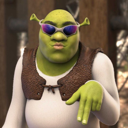

In [16]:
size = 128, 128
maziukas = normaliai.copy()
maziukas.thumbnail(size)
maziukas

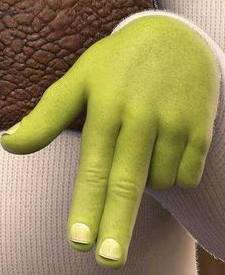

In [37]:
# box = 375, 450, 600, 725
rankele = normaliai.crop((375, 450, 600, 725), )
rankele

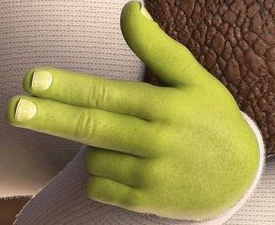

In [36]:
kairen = rankele.transpose(Image.Transpose.ROTATE_270)
kairen

In [45]:
kairen.size

(275, 225)

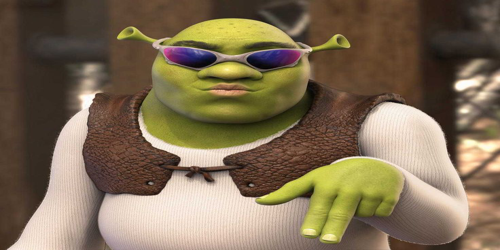

In [38]:
storas = normaliai.resize((500, 250))
storas

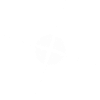

In [43]:
zvaigzde = Image.open("img/imgbin_white-shining-stars.png")
zvaigzdute = zvaigzde.resize((100, 100))
zvaigzdute

In [49]:
zvaigzdute.mode

'RGBA'

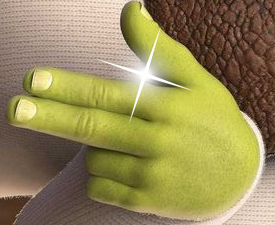

In [52]:
# apsibreziam zvaigzdes pozicija ant kopijuojamo paveiksliuko
# 95x25 - kairys virsutinis kampas, 95+plotis ant 25+aukstis - desinys apatinis kampas
zv_loc = (95, 25, 95+zvaigzdute.size[0], 25+zvaigzdute.size[1])
# pasidarom (del visa ko) kopija is "originalo"
bling_kairen = kairen.copy()
# i kopija idedam zvaigzdute, pagal nurodytas koordinates. 3 parametras yra ALPHA mask (jo reikia tik permatomiems paveiksliukams)
bling_kairen.paste(zvaigzdute, zv_loc, zvaigzdute)
# rezultatas
bling_kairen

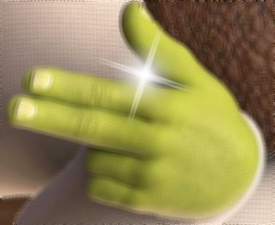

In [55]:
# filtrai
from PIL import ImageFilter
su_efektu = bling_kairen.filter(ImageFilter.BLUR)
su_efektu

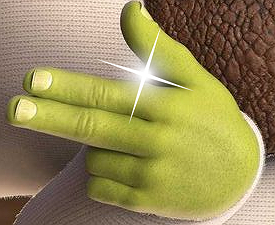

In [59]:
su_efektu = bling_kairen.filter(ImageFilter.DETAIL)
su_efektu

In [65]:
pixeldata = su_efektu.getdata()
print(su_efektu.size)
for pixel in enumerate(pixeldata):
    print(pixel)

(275, 225)
(0, (168, 146, 132))
(1, (185, 163, 149))
(2, (189, 167, 153))
(3, (179, 157, 143))
(4, (178, 156, 142))
(5, (210, 187, 173))
(6, (199, 176, 162))
(7, (192, 169, 155))
(8, (190, 167, 153))
(9, (190, 167, 153))
(10, (195, 172, 158))
(11, (201, 178, 164))
(12, (201, 178, 164))
(13, (182, 159, 145))
(14, (204, 181, 167))
(15, (203, 180, 166))
(16, (194, 171, 157))
(17, (204, 181, 167))
(18, (208, 185, 171))
(19, (201, 178, 164))
(20, (201, 178, 164))
(21, (181, 155, 142))
(22, (212, 186, 173))
(23, (194, 168, 155))
(24, (182, 156, 143))
(25, (212, 186, 171))
(26, (208, 182, 167))
(27, (186, 160, 145))
(28, (204, 178, 163))
(29, (202, 176, 159))
(30, (183, 157, 140))
(31, (171, 145, 128))
(32, (195, 169, 152))
(33, (219, 194, 174))
(34, (199, 174, 154))
(35, (189, 164, 144))
(36, (218, 193, 173))
(37, (196, 170, 153))
(38, (182, 156, 139))
(39, (199, 173, 156))
(40, (210, 184, 167))
(41, (189, 163, 146))
(42, (186, 160, 143))
(43, (207, 181, 164))
(44, (212, 186, 169))
(45, (179

In [71]:
new_pixels = [(abs(new[0] - 30), abs(new[1] + 20), abs(new[2] - 30)) for new in pixeldata]
for pixel in enumerate(new_pixels):
    print(pixel)

(0, (138, 166, 102))
(1, (155, 183, 119))
(2, (159, 187, 123))
(3, (149, 177, 113))
(4, (148, 176, 112))
(5, (180, 207, 143))
(6, (169, 196, 132))
(7, (162, 189, 125))
(8, (160, 187, 123))
(9, (160, 187, 123))
(10, (165, 192, 128))
(11, (171, 198, 134))
(12, (171, 198, 134))
(13, (152, 179, 115))
(14, (174, 201, 137))
(15, (173, 200, 136))
(16, (164, 191, 127))
(17, (174, 201, 137))
(18, (178, 205, 141))
(19, (171, 198, 134))
(20, (171, 198, 134))
(21, (151, 175, 112))
(22, (182, 206, 143))
(23, (164, 188, 125))
(24, (152, 176, 113))
(25, (182, 206, 141))
(26, (178, 202, 137))
(27, (156, 180, 115))
(28, (174, 198, 133))
(29, (172, 196, 129))
(30, (153, 177, 110))
(31, (141, 165, 98))
(32, (165, 189, 122))
(33, (189, 214, 144))
(34, (169, 194, 124))
(35, (159, 184, 114))
(36, (188, 213, 143))
(37, (166, 190, 123))
(38, (152, 176, 109))
(39, (169, 193, 126))
(40, (180, 204, 137))
(41, (159, 183, 116))
(42, (156, 180, 113))
(43, (177, 201, 134))
(44, (182, 206, 139))
(45, (149, 173, 106))

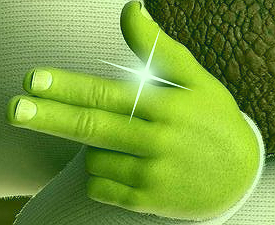

In [72]:
zalia_rankele = su_efektu.copy()
zalia_rankele.putdata(new_pixels)
zalia_rankele

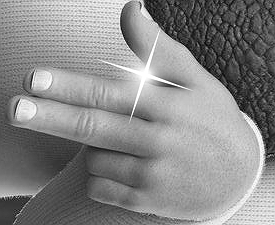

In [73]:
bw_rankele = su_efektu.convert("L")
bw_rankele

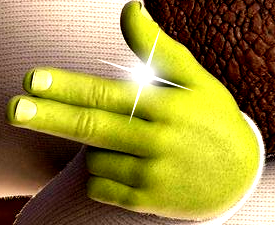

In [77]:
from PIL import ImageEnhance
ryskiai = ImageEnhance.Contrast(bling_kairen)
ryskiai.enhance(1.7)

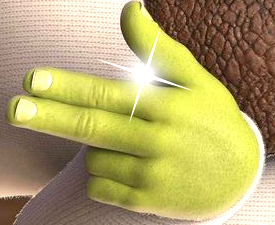

In [86]:
sviesiai = ImageEnhance.Brightness(bling_kairen)
sviesiai.enhance(1.2)

(1280, 720)


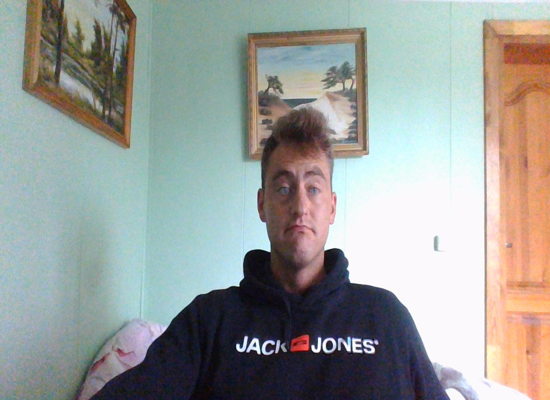

In [66]:
mano = Image.open("img\\fotki.jpg")
print(mano.size)
size = 550, 400
mazesne = mano.resize(size)
mazesne

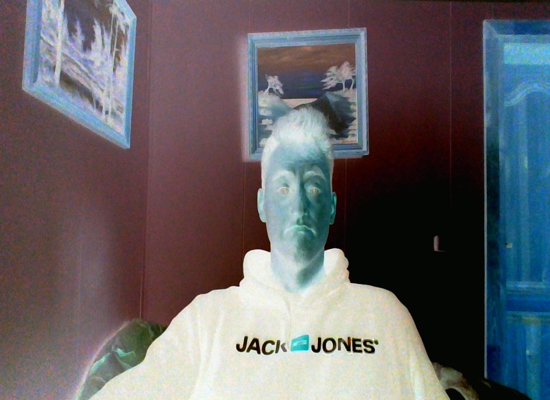

In [18]:
from PIL import ImageOps, ImageFilter, ImageEnhance


keista = ImageOps.invert(mazesne)
keista

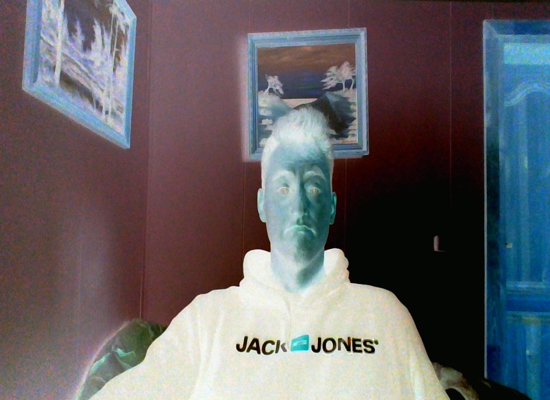

In [26]:
pixeldata = mazesne.getdata()
new_pixels = [(abs(255 -new[0] ), abs(255 - new[1]), abs(255 - new[2])) for new in pixeldata]
nauji_pikseliai = mazesne.copy()
nauji_pikseliai.putdata(new_pixels)
nauji_pikseliai

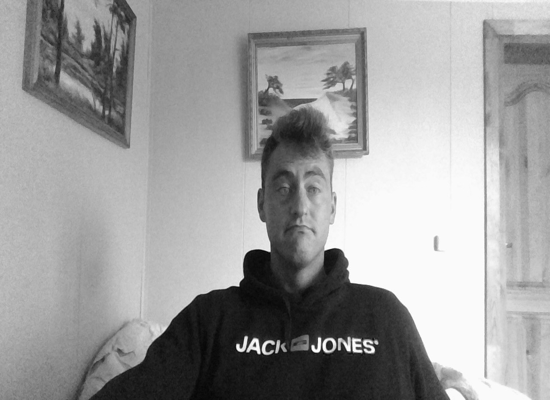

In [39]:
juoda_balta = mazesne.convert("L")
juoda_balta

(450, 450)
RGB


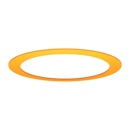

In [73]:
zvaigzde = Image.open("img\\imgbin_white-shining-stars.png")
saint =  Image.open("img\\saint.png")
print(saint.size)
print(saint.mode)
saint_maz = saint.resize((130, 130))
saint_maz
# maza_zv = zvaigzde.resize((100,100))
# zv_loc = (240, 80, 240+maza_zv.size[0], 80+maza_zv.size[1])
# mazesne.paste(maza_zv, zv_loc, maza_zv)
# mazesne

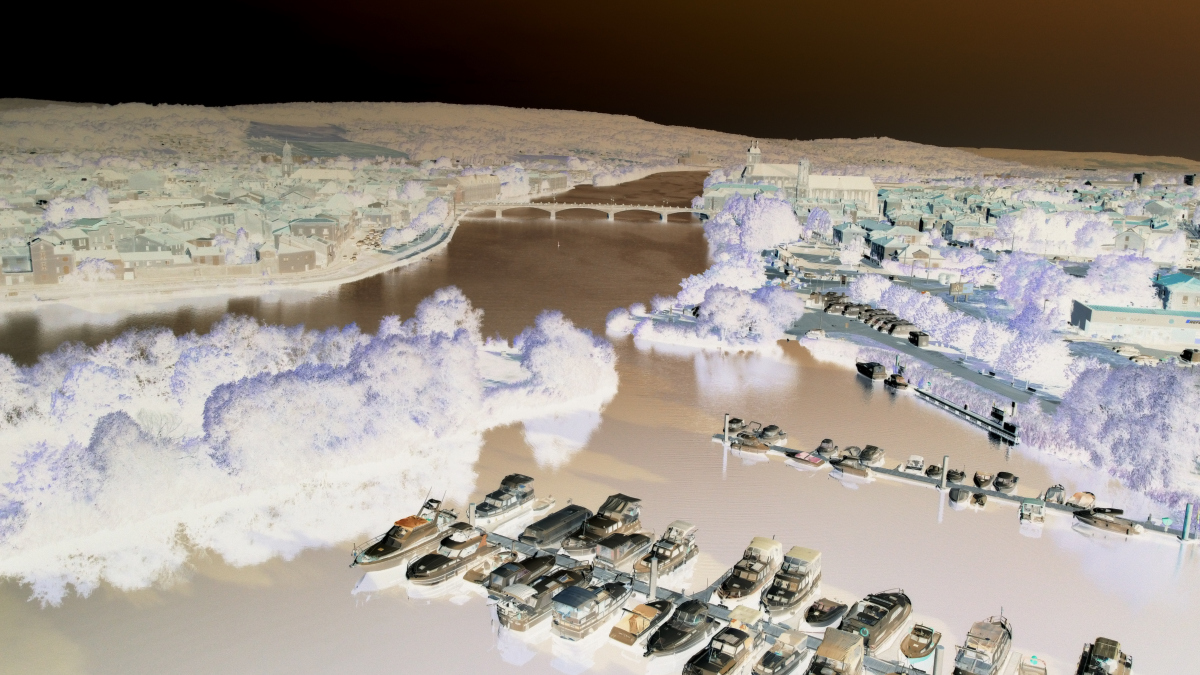

In [81]:
dangus = Image.open("img\\pont_au_mousson.jpg")
for x in range(0, dangus.size[0]):
    for y in range(0, dangus.size[1]):
        pixeliai = dangus.getpixel((x,y))
        red_pixel = 255 - pixeliai[0]
        green_pixel = 255 - pixeliai[1]
        blue_pixel = 255 - pixeliai[2]
        dangus.putpixel((x, y),(red_pixel, green_pixel, blue_pixel))
dangus